<h1> Iris </h1>

The dataset contains the sepal and petal length and width of Iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica. The goal is to predict the species given the sepal and petal length and width.

<h2 style="background-color:rgba(100,100,100,0.5);"> Frame the problem </h2>

Iris species predictor is clearly a typical supervised learning task, since you are given labeled training examples.

It is also a typical classification task, since you are asked to classify the species of flower.

Finally, there is no continuous flow of data coming into the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

<h2 style="background-color:rgba(100,100,100,0.5);"> Fetch and load data </h2>


In [22]:
from sklearn.datasets import fetch_openml

# Fetch the data
# as_Frame=True will fetch data as pandas dataframe
# as_Frame=False will fetch data as array
iris = fetch_openml('iris', version=1, as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

<h2 style="background-color:rgba(100,100,100,0.5);"> Analyze the data and its structure </h2>

In [23]:
X, y = iris["data"], iris["target"]

# Display shape
print(X.shape)
print(y.shape)

# Display head
print(X.head())
print(y.head())

# Display info
print(X.info())

# Display percentage of missing values for each attribute
print(X.isnull().sum() / len(X) * 100)

# Display the flower species categories
print(y.cat.categories)

(150, 4)
(150,)
   sepallength  sepalwidth  petallength  petalwidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
sepallength    0.0
sepalwidth     0.0
petallength    0.0
petalwidth     0.0
dtyp

<h3><b>How many instances are there in the dataset</b></h3>

There are 150 values in the data set, which is not very large.

<h3><b>Are there missing values (non-null) for any attributes</b></h3>

>Data cleaning will need to be done to address any missing values

All the parameters - sepal length, sepal width, petal length and petal width do not have missing values.

<h3><b>What are the numerical and categorical attributes</b></h3>

>Categorical attributes will need to be mapped to numerical values (encoding)

All the parameters - sepal length, sepal width, petal length and petal width are numerical attributes.

In [24]:
X.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3><b> Preview the center and dispersion of the features </b></h3>

The above values show the center and dispersion of the features.

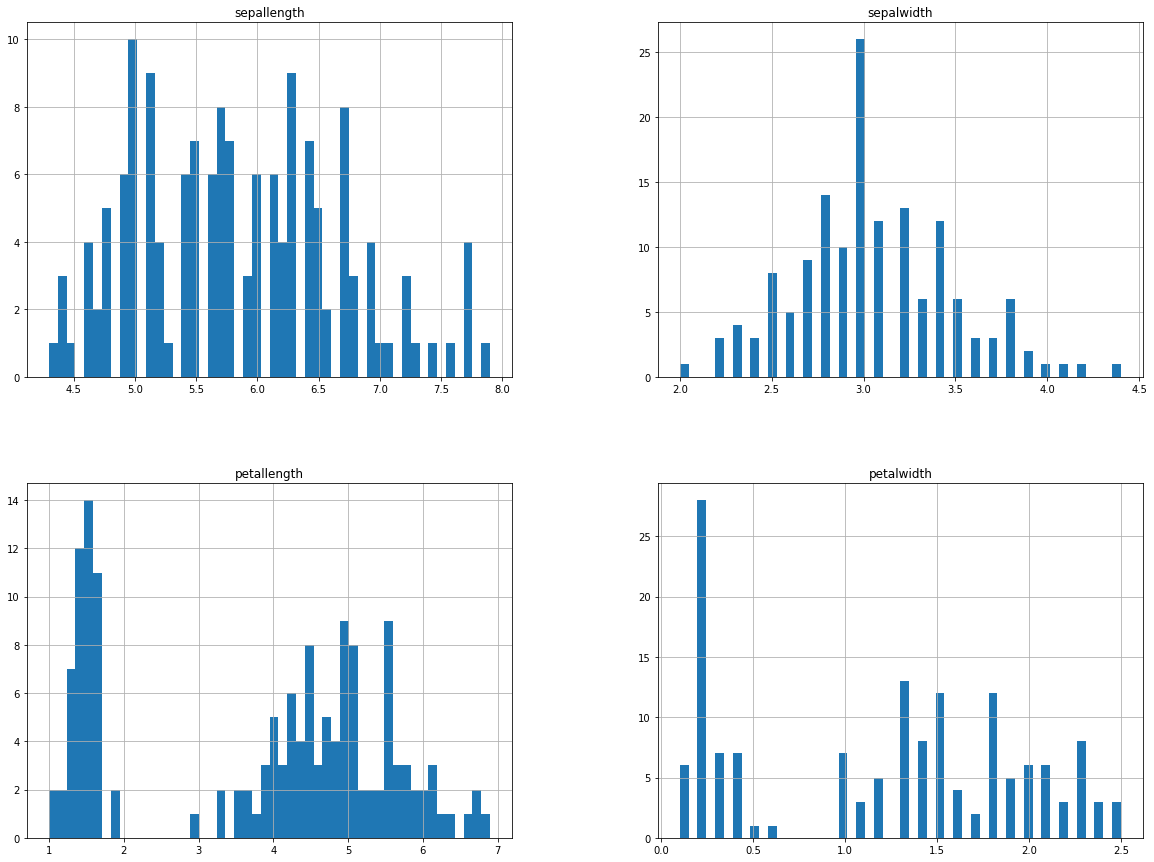

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(20, 15))
plt.show()

<h3><b>Plot the distributions for the features</b></h3>

The three keys to describing the distributions are shape, center, and spread.
Consider clusters, gaps, modes, and outliers.
Look for reasons behind any unusual features.

Shape:
>A few common shapes are symmetric, skewed to the right, skewed to the left, bell-shaped, and uniform distributions. Consider transforming tail-heavy distributions to be more bell-shaped.

Spread:
>Check whether the end values in the range have been capped. For these capped values, either collect actual values to replace the capped values or remove the values from the dataset (The system should not be evaluated poorly if it predicts values beyond the capped values).

>Understand the units for each distribution, whether any scaling has been applied. Consider apply feature scaling for features with different scales (Machine Learning algorithms usually don’t perform well when the input numerical attributes have very different scales).

The sepal width seems to show the expected normal distribution. The other distributions are interesting in that some seem to be bi-modal, there are no values that seem to be capped.

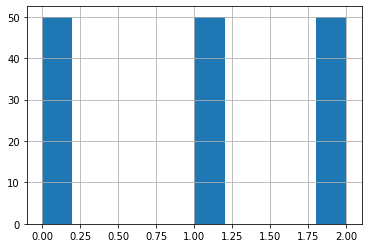

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a pandas series with numbers instead of string ('0', '1')
# Most ML algorithms expect numbers, not strings
y = y.cat.codes.astype(np.uint8)
y.hist()
plt.show()

Although there is not much in interpreting the output distribution, it is interesting that all the flower species are equally represented.

<h2 style="background-color:rgba(100,100,100,0.5);"> Sample the data for testing and training purposes </h2>

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is train_test_split(), we'll use this with the random_state parameter. Also, since this function can accept multiple datasets with an identical number of rows, and it will split them on the same indices, we can use it to split both the data and target (we'll use stratify on the target so the test and training data will have similar distribution for the target as the original data).

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

<h2 style="background-color:rgba(100,100,100,0.5);"> Discover and visualize the data to gain insights </h2>

There is no additional value that we can get from attribute transformation, so we can skip this step for this problem.

<h2 style="background-color:rgba(100,100,100,0.5);"> Prepare the Data for Machine Learning Algorithms </h2>

Data cleaning is not required for this data set to clean up missing attributes.

Custom transformation is not needed for this data set.

Feature scaling can be useful to improve the performance of the models.

Ffirst let’s revert to a clean training set (by copying X_train once again):

In [28]:
iris = X_train.copy()

<h3><b> Data Cleaning - Missing attributes </b></h3>

Data cleaning is not required for this data set to clean up missing attributes.

<h3><b> Data Cleaning - Handling text and categorical attributes </b></h3>

Custom transformation is not needed for this data set.

<h3><b> Feature Scaling </b></h3>

One of the most important transformations you need to apply to your data is feature scaling. 

For this, we will use the scaler directly in the pipeline later to scale these values.

<h3><b> Custom Transformers </b></h3>

Custom transformers are not needed for this data set.

<h3><b> Transformation Pipelines </b></h3>

Scikit-Learn provides the Pipeline class to help with sequences of transformations.

Pipeline for numerical attributes:

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

num_pipeline = Pipeline([
    ('robust_scaler', RobustScaler())
])

iris_prepared = num_pipeline.fit_transform(iris)

<h2 style="background-color:rgba(100,100,100,0.5);"> Select and Train Models </h2>

Select a model that you think might work best first. Train and evaluate the performance of this model. The model might fit correctly, underfit or overfit the actual data.

The general approach when a particular model doesn't quite fit perfectly, is to try out many other models from various categories of Machine Learning algorithms (e.g., several Support Vector Machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters for a particular model.

The goal is to shortlist a few (two to five) promising models.


<h3><b> Training and Evaluating on the Training Set </b></h3>

Select a model to train and evaluate on the data set.

Let’s simplify the problem for now and only try to identify one species—for example, 'Iris-setosa'. This will be an example of a binary classifier, capable of distinguishing between just two classes, 'Iris-setosa' and not-'Iris-setosa'. Let’s create the target vectors for this classification task:

In [30]:
y_train_setosa = (y_train == 0)  # True for all Iris-setosas, False for all other species
y_test_setosa = (y_test == 0)

Let's first use the RandomForestClassifier.

<h3><b> Predict values for some data inputs </b></h3>

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(iris_prepared, y_train_setosa)

print(forest_clf.predict(iris_prepared[:1]))
print(y_train_setosa[:1]) # verify that the predicted value is correct

[False]
73    False
dtype: bool


<h3><b> Measure the performance of the model on the whole training set </b></h3>

Evaluating a classifier is often significantly trickier than evaluating a regressor. There are many performance measures available.

One measure is Accurracy, let's use K-fold cross validation to measure the accurracy.

In [41]:
from sklearn.model_selection import cross_val_score

cross_val_score(forest_clf, iris_prepared, y_train_setosa, cv=3, scoring="accuracy")

array([1., 1., 1.])

<h3><b> Confusion Matrix </b></h3>

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).



In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(forest_clf, iris_prepared, y_train_setosa, cv=3)
confusion_matrix(y_train_setosa, y_train_pred)

array([[80,  0],
       [ 0, 40]], dtype=int64)

<h3><b> Precision and Recall </b></h3>

$ Precision = \cfrac{TP}{(TP + FP)} $

$ Recall = \cfrac{TP}{(TP + FN)} $ (also called sensitivity, true positive rate (TPR))

Other terms:

$ FPR = \cfrac{FP}{(FP + TN)} $

$ TNR = \cfrac{TN}{(FP + TN)} $ (also called specificity)

In [44]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_setosa, y_train_pred))
print(recall_score(y_train_setosa, y_train_pred))

1.0
1.0


<h3><b> F1 score </b></h3>

<div style="background-color:white;color:black">

$ F_1 = 
\cfrac{2}{\cfrac{1}{precision} + \cfrac{1}{recall}} = 
2 \times \cfrac{precision \times recall}{precision + recall} = 
\cfrac{TP}{TP + \cfrac{FN + FP}{2}}
 $

</div>

In [46]:
from sklearn.metrics import f1_score

print(f1_score(y_train_setosa, y_train_pred))

1.0


<h3><b> Precision-Recall (PR) Curve </b></h3>

The plots of precision and recall for different threshold values is called the PR curve.

 The RandomForestClassifier class has a predict_proba() method which returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class:

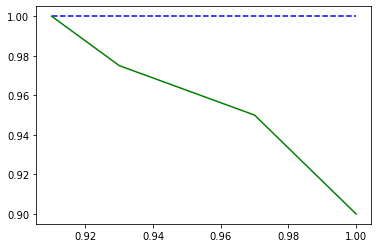

In [49]:
from sklearn.metrics import precision_recall_curve

y_probas = cross_val_predict(forest_clf, iris_prepared, y_train_setosa, cv=3,
                             method="predict_proba")

y_scores = y_probas[:, 1]   # score = probability of positive class

precisions, recalls, thresholds = precision_recall_curve(y_train_setosa, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

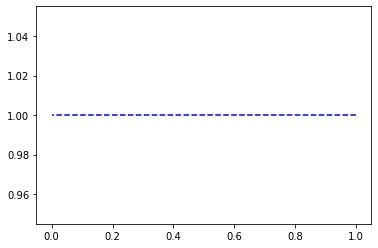

In [48]:
plt.plot(recalls, precisions, "b--",)
plt.show()

You can see that precision really starts to fall sharply around 90% recall. You will probably want to select a precision/recall trade-off just before that drop.

Also, the precision remains the same as you increase the recall value, so we can choose high values for both and still get good predictions.

Suppose you decide to aim for 90% precision. You look up the first plot and find the threshold value.

To be more precise you can search for the lowest threshold that gives you at least 90% precision. To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can use the threshold with the scores:

In [52]:
y_train_pred_90 = (y_scores >= .9)

print(precision_score(y_train_setosa, y_train_pred_90))
print(recall_score(y_train_setosa, y_train_pred_90))

1.0
1.0


The default threshold value is .5. This corresponds to saying that Iris-setosa vs not Iris-setosa is 50% probable. So, if the probability score is greater than .5, we're accepting it as Iris-setosa 5 and if it is less than .5, we're accepting it as not Iris-setosa. 

Here, we're changing this threshold value to be .9 and evaluate what scores we get for the precision and recall.

Great, you have a 90% precision classifier! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. But, you'll have to measure the recall score, to see if it is too low as a acceptable for the specific problem. In this particular case, we get high values for both, which is great.

<h3><b> ROC Curve </b></h3>

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.

It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR). The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to 1 – the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity.

Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_setosa, y_scores)

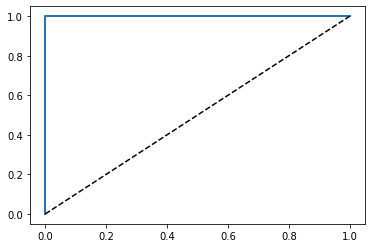

In [54]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid

plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a trade-off: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

In [56]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_train_setosa, y_scores))

1.0


<h3><b> ROC vs PR Curve </b></h3>

Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how to decide which one to use.

As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives. Otherwise, use the ROC curve.

<h3><b> Try other models and measure scores </b></h3>

Let’s now train a SGDClassifier and compare its ROC curve and ROC AUC score to those of the RandomForestClassifier. First, you need to get scores for each instance in the training set. We can use the decision_function() method of the SGDClassifier class to get the scores (equivalent to the predict_proba() method of the RandomForestClassifier class). Scikit-Learn classifiers generally have one or the other, or both.

In [57]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
y_scores_sgd = cross_val_predict(sgd_clf, iris_prepared, y_train_setosa, cv=3,
                             method="decision_function")

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_setosa, y_scores_sgd)

Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as well to see how they compare.

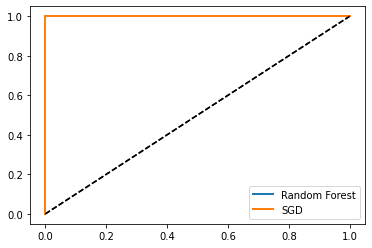

In [65]:
plot_roc_curve(fpr, tpr, "Random Forest")
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plt.legend(loc="lower right")
plt.show()

In [66]:
print(roc_auc_score(y_train_setosa, y_scores_sgd))

y_scores_sgd = cross_val_predict(sgd_clf, iris_prepared, y_train_setosa, cv=3)
print(precision_score(y_train_setosa, y_scores_sgd))
print(recall_score(y_train_setosa, y_scores_sgd))

1.0
1.0
1.0


Based on the ROC AUC score, precision and recall scores, it looks like the Random Forest classifier and SGD classifier are both good.

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
y_probas_knn = cross_val_predict(knn_clf, iris_prepared, y_train_setosa, cv=3,
                                  method="predict_proba")

y_scores_knn = y_probas_knn[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_setosa, y_scores_knn)

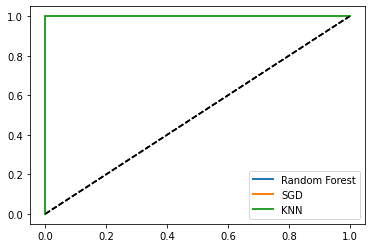

In [85]:
plot_roc_curve(fpr, tpr, "Random Forest")
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plt.legend(loc="lower right")
plt.show()

In [86]:
print(roc_auc_score(y_train_setosa, y_scores_knn))

y_scores_knn = cross_val_predict(knn_clf, iris_prepared, y_train_setosa, cv=3)

print(precision_score(y_train_setosa, y_scores_knn))
print(recall_score(y_train_setosa, y_scores_knn))

1.0
1.0
0.975


Based on the ROC AUC score, precision and recall scores, it looks like the Random Forest classifier (and SGD classifer) is the better among the three.

In [87]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
y_probas_log = cross_val_predict(log_clf, iris_prepared, y_train_setosa, cv=3,
                                  method="predict_proba")

y_scores_log = y_probas_log[:, 1]


fpr_log, tpr_log, thresholds_log = roc_curve(y_train_setosa, y_scores_log)

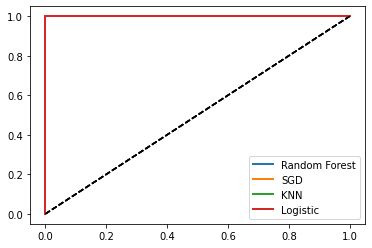

In [88]:
plot_roc_curve(fpr, tpr, "Random Forest")
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plot_roc_curve(fpr_log, tpr_log, "Logistic")
plt.legend(loc="lower right")
plt.show()

In [89]:
print(roc_auc_score(y_train_setosa, y_scores_log))

y_scores_log = cross_val_predict(log_clf, iris_prepared, y_train_setosa, cv=3)

print(precision_score(y_train_setosa, y_scores_log))
print(recall_score(y_train_setosa, y_scores_log))

1.0
1.0
0.975


After evaluating the models based on their ROC AUC score, precision and recall scores, we have to choose the most promising model. For the purposes of this example, let us assume that the Logistic Regression is the chosen model.

<h2 style="background-color:rgba(100,100,100,0.5);"> Fine-Tune Your Model </h2>

After shortlisting some promising models, you need to fine-tune the models.

Grid Search
One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

Instead, you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values.

For example, the following code searches for the best combination of hyperparameter values for the Logistic Regression classifier.

In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_iter': [100, 500, 1000],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    },
]

grid_search = GridSearchCV(log_clf, param_grid, cv=3)
grid_search.fit(iris_prepared, y_train_setosa)

print(grid_search.best_params_)

{'max_iter': 100, 'solver': 'liblinear'}


<h2 style="background-color:rgba(100,100,100,0.5);"> Analyze the Best Models and Their Errors </h2>

You will often gain good insights on the problem by inspecting the best models.

First, look at the confusion matrix. You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function (for the default threshold value):

In [92]:
log_clf = grid_search.best_estimator_

y_train_pred = cross_val_predict(log_clf, iris_prepared, y_train_setosa, cv=3)
conf_mx = confusion_matrix(y_train_setosa, y_train_pred)

print(conf_mx)

[[80  0]
 [ 0 40]]


It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow() function:

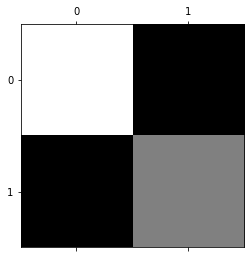

In [97]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

A good confusion matrix will have most images on the main diagonal which means that they were classified correctly. The predictions for Iris-setosa look darker than the not survived, which could mean that there are fewer survived in the dataset or that the classifier does not perform as well on the Iris-setosa as on the non-Iris-setosa. In this particular case, it looks like that there are few in the dataset for the Iris-setosa species.

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of errors (which would make abundant classes look unfairly bad), then fill the diagonal with zeros to keep only the errors, and plot the result.

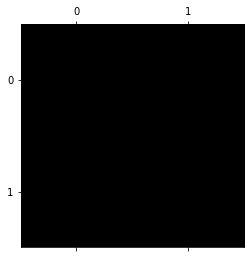

In [98]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

The rows represent actual classes, while columns represent predicted classes. It looks like the classifier misses a lot of survived classifications (false negatives).

Analyzing the confusion matrix often gives you insights into ways to improve your classifier. Looking at this plot, it looks like there are no errors.

<h2 style="background-color:rgba(100,100,100,0.5);"> Evaluate Your System on the Test Set </h2>

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.

There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call transform(), not fit_transform — you do not want to fit the test set!), and evaluate the final model on the test set.


In [99]:
from sklearn.metrics import classification_report

final_model =  grid_search.best_estimator_

X_test_prepared = num_pipeline.transform(X_test)
y_test_pred = final_model.predict(X_test_prepared)

print(classification_report(y_test_setosa, y_test_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        20
        True       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<h2 style="background-color:rgba(100,100,100,0.5);"> Multiclass Classification </h2>

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as Logistic Regression classifiers, Random Forest classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively. Others (such as SGD Classifiers or Support Vector Machine classifiers) are strictly binary classifiers (with strategies that you can use to perform multiclass classification with these multiple binary classifiers).

Let's use SoftMax Regression (the multi-class version of the Logistic Regression classifier) first and then try out other models (e.g. binary classifiers with OvR and OvO strategies).

<h3><b> Training and Evaluating on the Training Set </b></h3>

Select a model to train and evaluate on the data set.

Let’s use the Softmax Regression to train and predict.

We can use the original target classes for all flower species - Iris-setosa, Iris-versicolor and Iris-virginica (y_train), instead of the Iris-setosa-versus-the-rest target classes (y_train_setosa) since we are now training for multiclass classification.

In [101]:
sofmax_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs")
sofmax_clf.fit(iris_prepared, y_train) # y_train, not y_train_setosa

LogisticRegression(multi_class='multinomial')

<h3><b> Predict values for some data inputs </b></h3>


In [103]:
some_flower = [[5, 3, 1.5, 0.25]]
print(sofmax_clf.predict(some_flower))

[2]


This code trains the SVC on the training set using the original target classes for all flower species(y_train), instead of the Iris-setosa-versus-the-rest target classes (y_train_setosa). Then it makes a prediction.

Under the hood, Scikit-Learn actually uses Stochastic Gradient Descent for Logistic Regression (there is no closed form solution).

The decision_function() method returns one score per class:

In [105]:
some_flower_scores = sofmax_clf.decision_function(some_flower)
print(some_flower_scores)

[[-9.08924161  1.65608166  7.43315994]]


The highest score is indeed the one corresponding to class 2 (Iris-virginica).

In [108]:
# When a classifier is trained, it stores the list of target classes in its classes_ attribute,
# ordered by value. In this case, the index of each class in the classes_ array conveniently
# matches the class itself (e.g., the class at index 0 happens to be class 0), 
# but in general you won’t be so lucky.
print(sofmax_clf.classes_)

[0 1 2]


<h3><b> Try other models and measure scores </b></h3>

Let’s use the Support Vector Machine to train and predict.

In [111]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear")
svm_clf.fit(iris_prepared, y_train) # y_train, not y_train_setosa

SVC(kernel='linear')

<h3><b> Predict values for some data inputs </b></h3>


In [112]:
print(svm_clf.predict(some_flower))

[2]


This code trains the SVC on the training set using the original target classes and then it makes a prediction.

Under the hood, Scikit-Learn actually used the OvO strategy: it trained 3 binary classifiers, got their decision scores for the image, and selected the class that won the most duels.

The decision_function() method returns 3 scores per instance (instead of just 1). That’s one score per class (it’s the number of won duels plus or minus a small tweak to break ties, based on the binary classifier scores):

In [113]:
some_flower_scores = svm_clf.decision_function(some_flower)
print(some_flower_scores)

[[-0.29852698  1.20755912  2.29128054]]


The highest score is indeed the one corresponding to class 2 (Iris-virginica).

<h3><b> Try other models and measure scores </b></h3>

The SGDClassifier uses the OvR under the hood for multiclass classification.

In this example, since there are 3 classes, it will train 3 binary classifiers. The decision_function() will return one value per class.

In [114]:
sgd_clf.fit(iris_prepared, y_train)

print(sgd_clf.predict(some_flower))
print(sgd_clf.decision_function(some_flower))

print(cross_val_score(sgd_clf, iris_prepared, y_train, cv=3, scoring="accuracy"))

[2]
[[-49.78110533 -16.00751825  21.32353684]]
[1.   0.75 0.95]


<h3><b> Try other models and measure scores </b></h3>

Let's try with RandomForest classifier.

In [123]:
forest_clf.fit(iris_prepared, y_train)

print(forest_clf.predict(some_flower))
print(forest_clf.predict_proba(some_flower))

print(cross_val_score(forest_clf, iris_prepared, y_train, cv=3, scoring="accuracy"))

[2]
[[0.01 0.24 0.75]]
[1.   0.9  0.95]


<h3><b> Fine-Tune Your Model </b></h3>

Let' assume that you have identified the most promising models and use Grid Search to fine-tune the models.

In [125]:
param_grid = [
    {'n_estimators': [100, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [5, 7, 10]
    },
]

grid_search = GridSearchCV(forest_clf, param_grid, cv=3)
grid_search.fit(iris_prepared, y_train)

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


<h3><b> Analyze the Best Models and Their Errors </b></h3>

You will often gain good insights on the problem by inspecting the best models.

First, look at the confusion matrix. You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function, just like you did earlier:

In [126]:
forest_clf = grid_search.best_estimator_

y_train_pred = cross_val_predict(forest_clf, iris_prepared, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

print(conf_mx)

[[40  0  0]
 [ 0 37  3]
 [ 0  3 37]]


It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow() function:

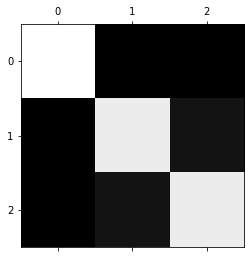

In [127]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks pretty good, since most images are on the main diagonal, which means that they were classified correctly. The Iris-versica and Iris-virginicas look slightly darker than the Iris-setosa, which could mean that there are fewer of these in the dataset or that the classifier does not perform as well on these.

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of errors (which would make abundant classes look unfairly bad), fill the diagonal with zeros to keep only the errors, and plot the result:

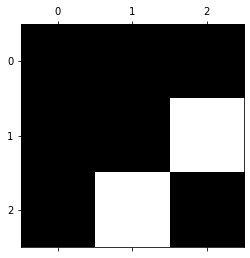

In [128]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

<h2 style="background-color:rgba(100,100,100,0.5);"> Evaluate Your System on the Test Set </h2>

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.

There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call transform(), not fit_transform — you do not want to fit the test set!), and evaluate the final model on the test set.


In [99]:
from sklearn.metrics import classification_report

final_model =  grid_search.best_estimator_

X_test_prepared = num_pipeline.transform(X_test)
y_test_pred = final_model.predict(X_test_prepared)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        20
        True       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<h2 style="background-color:rgba(100,100,100,0.5);"> Summary </h2>

This exercise demonstrates how to do build a classification model for the Iris data set. This presents an overview of the steps, but does not exhaustively consider all possible different models, nor does it select the best possible hyperparameters but, nevertheless performs reasonably well based on the scores.